In [14]:
import skimage
import tifffile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
from scipy.optimize import curve_fit
from matplotlib import rcParams
from statsmodels.stats.weightstats import ttest_ind
from statannotations.Annotator import Annotator
from math import floor
rcParams['figure.dpi'] = 250
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 10

In [15]:

data_dirs = {
    'DIV11' : 
    Path('/lab/processed-data/230303_iN_B5_DIV11_LiveCell/iN_B5_D11_LiveCell_20xH2O__2023-03-03T14_21_01-Measurement 1'),
    'DIV14' :
    Path('/lab/processed-data/230227_iN_B4_DIV14_LiveCell/1__2023-02-27T21_03_45-Measurement 4'),
    'DIV16_10x' : 
    Path('/lab/processed-data/230215_BC_Live/1__2023-02-15T17_25_23-Measurement 2'),
    'DIV16_63x' : 
    Path('/lab/processed-data/230215_BC_Live/2__2023-02-15T18_09_38-Measurement 1'),
    'DIV28' :
    Path('/lab/processed-data/230227_iN_B3_DIV28_LiveCell/1__2023-02-27T21_51_31-Measurement 5'),
    'DIV31' : 
    Path('/lab/processed-data/230302_iN_B3_DIV31_MG132_LiveCell/iN_B3_DIV31_MG132__2023-03-02T15_25_55-Measurement 1'),
    'DIV31_40x' : 
    Path('/lab/processed-data/230302_iN_B3_DIV31_MG132_LiveCell/iN_B3_DIV31_MG132_40xH2O__2023-03-02T16_07_40-Measurement 1'),
}

/tmp/ipykernel_23579/2982423565.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'col', 'concentration']).mean()
/tmp/ipykernel_23579/2982423565.py:45: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_23579/2982423565.py:45: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_23579/2982423565.py:45: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(
/tmp/ipykernel_23579/2982423565.py:45: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


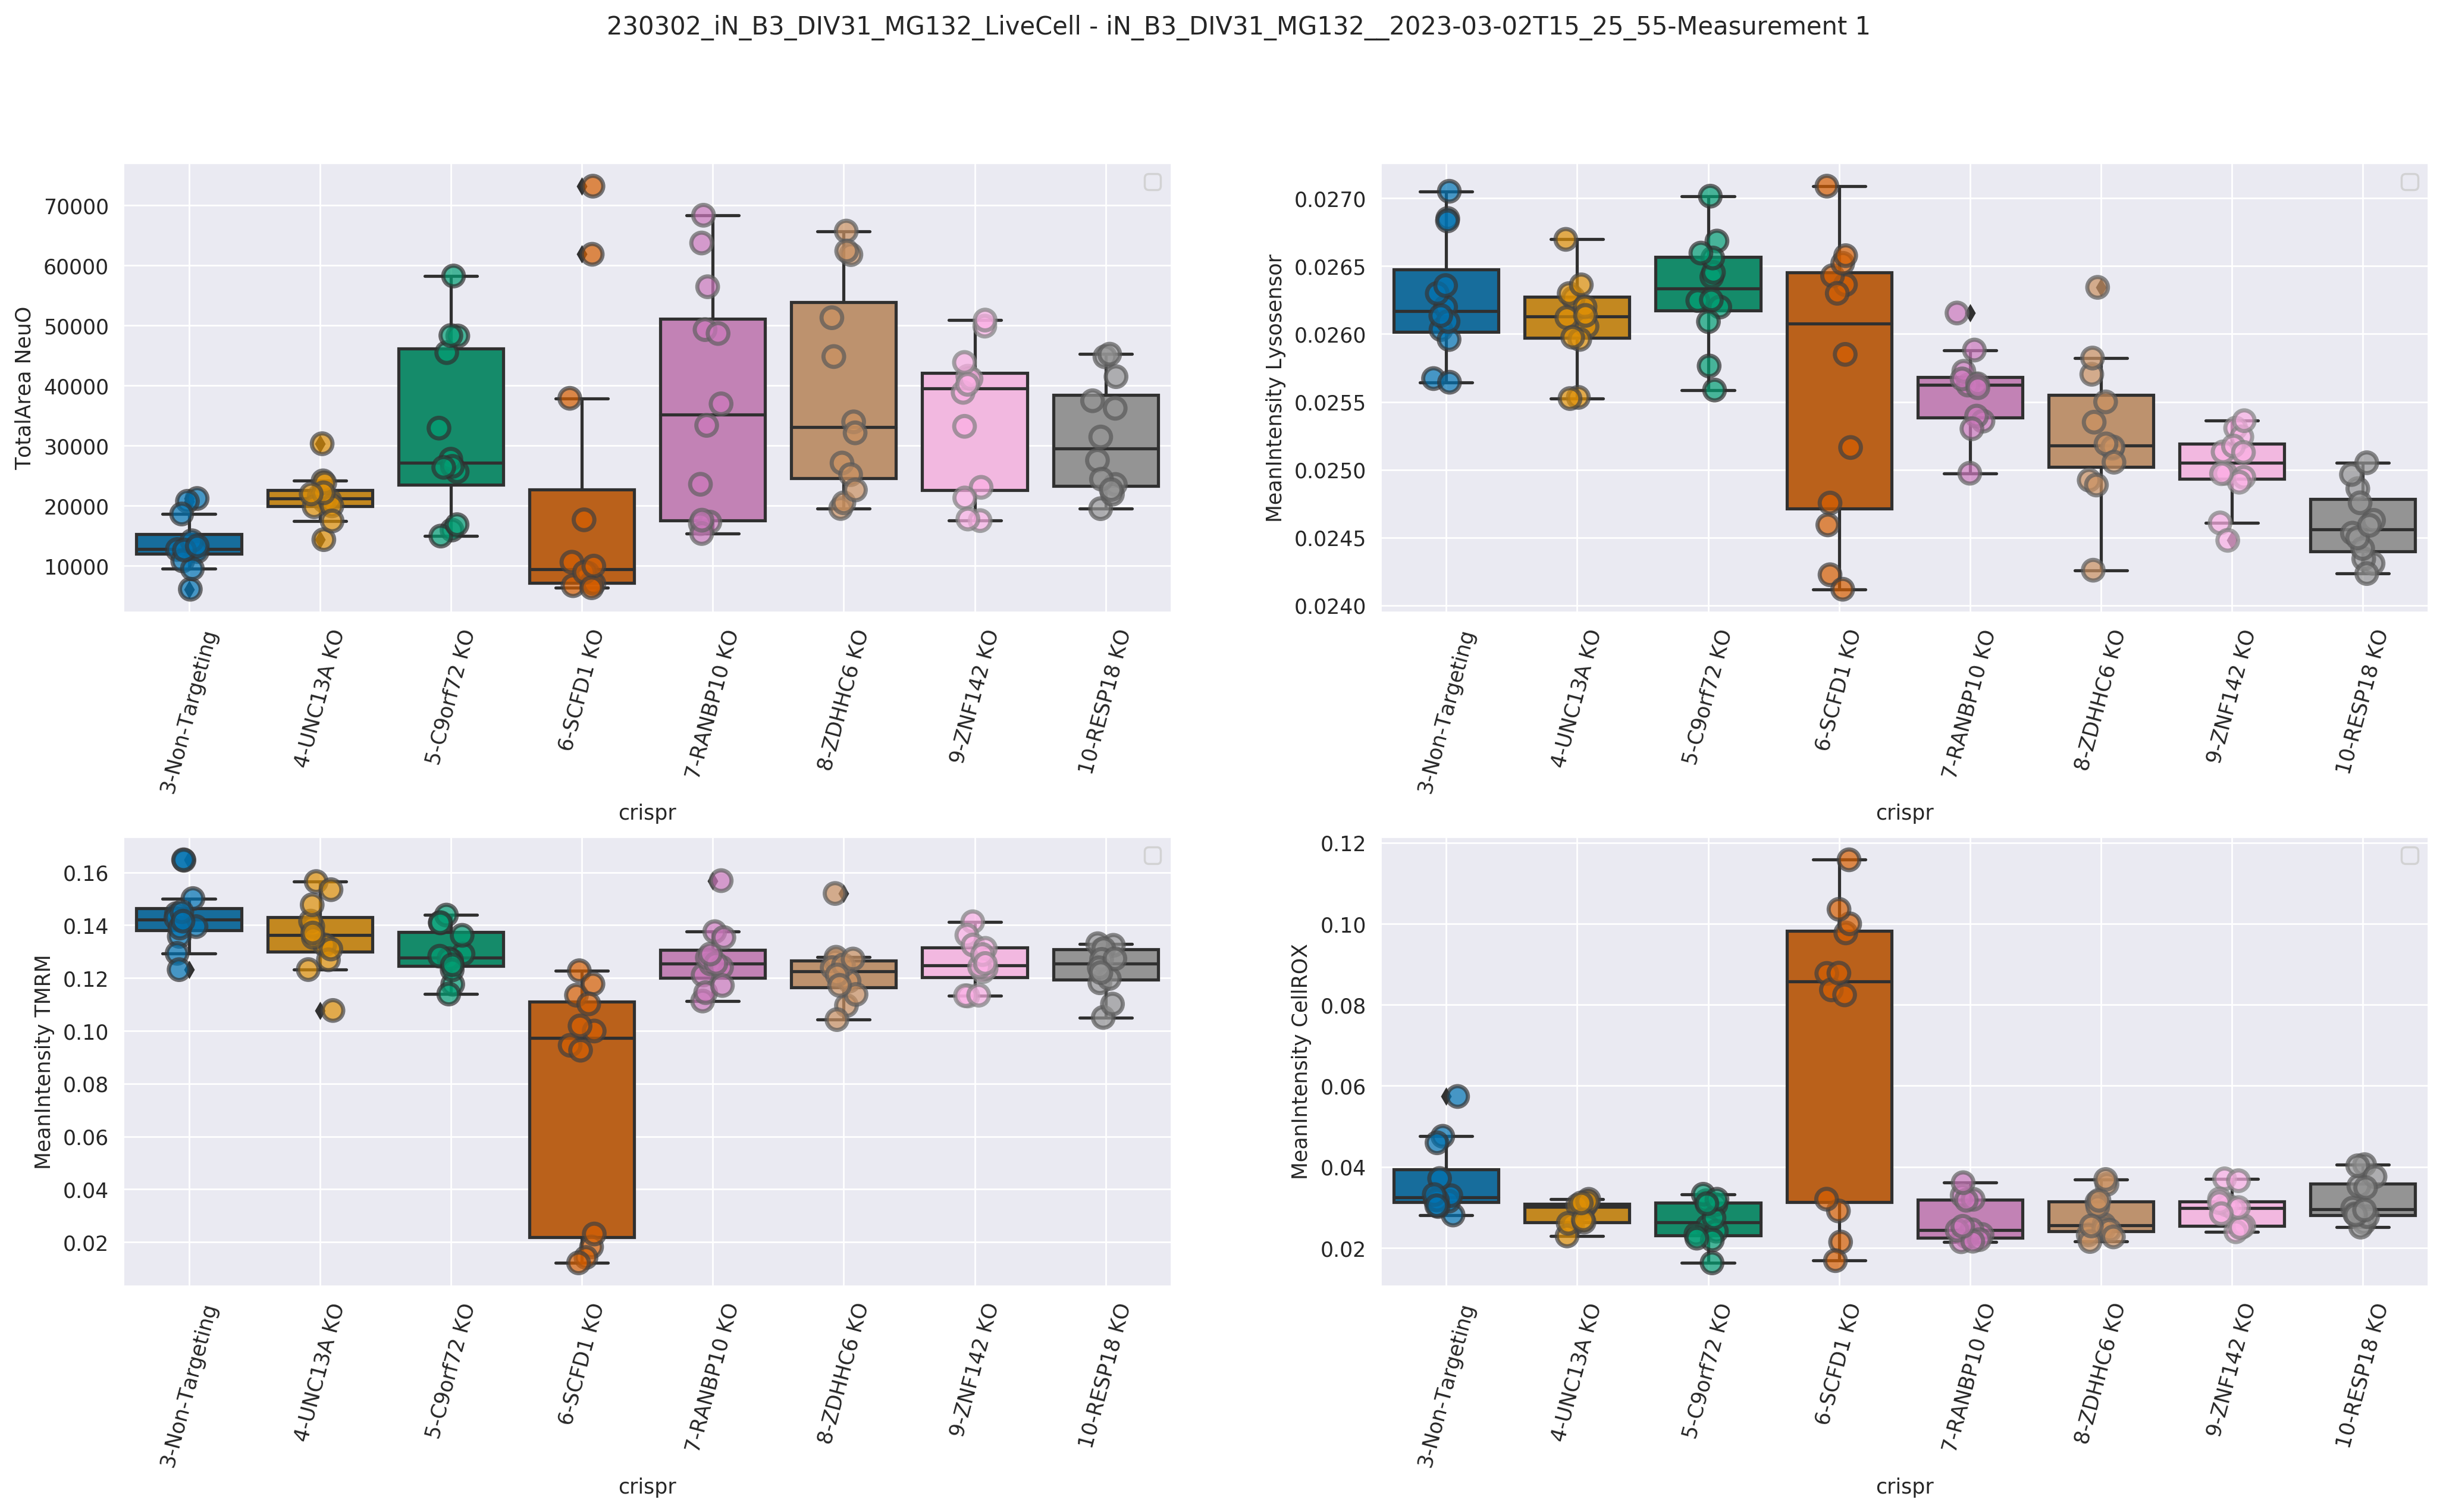

In [13]:
data_dir = data_dirs['DIV31']
platemap = pd.read_csv(data_dir / 'platemap.csv')
data = pd.read_csv(data_dir / '2023-02-28_soma_segment' / '2023-02-28_soma_segment_Image.csv')

# Set filename and well position
data['well_position'] = data['FileName_NeuO_pre_illum'].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data['FileName_NeuO_pre_illum'].apply(
lambda fname : int(fname[1:3])
)
data['col'] = data['FileName_NeuO_pre_illum'].apply(
    lambda fname : int(fname[4:6])
)

data = data.merge(platemap, on='well_position')
# data = data.groupby(['well_position', 'crispr']).mean()
data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'col', 'concentration']).mean()
data = data.reset_index()
data['crispr'] = data['col'].astype(str) + '-' + data['crispr']
measurements = [
    'Intensity_TotalArea_NeuO_masked',
    'Intensity_MeanIntensity_Lysosensor_masked',
    'Intensity_MeanIntensity_TMRM_masked',
    'Intensity_MeanIntensity_CellROX_masked'
]

sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2)

for i_m, m in enumerate(measurements):

    axs_row = floor(i_m/2)
    axs_col = i_m % 2

    sns.boxplot(
        data=data, 
        x='crispr', 
        # x='concentration',
        y=m, 
        palette='colorblind',
        # hue='crispr',
        ax=axs[axs_row, axs_col]
    )
    sns.stripplot(
        data=data, 
        x='crispr', 
        # x='concentration',
        y=m, 
        palette='colorblind', 
        # hue='crispr',
        # dodge=True,
        linewidth=2, 
        size=10, 
        alpha=0.7,
        ax=axs[axs_row, axs_col])
    
    axs[axs_row, axs_col].tick_params(axis='x', rotation=75)
    axs[axs_row, axs_col].set_ylabel(m.split('_')[1] + ' ' + m.split('_')[2])
    axs[axs_row, axs_col].xaxis.grid(True)
    axs[axs_row, axs_col].legend('')
    
plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

/tmp/ipykernel_267386/1994904754.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()


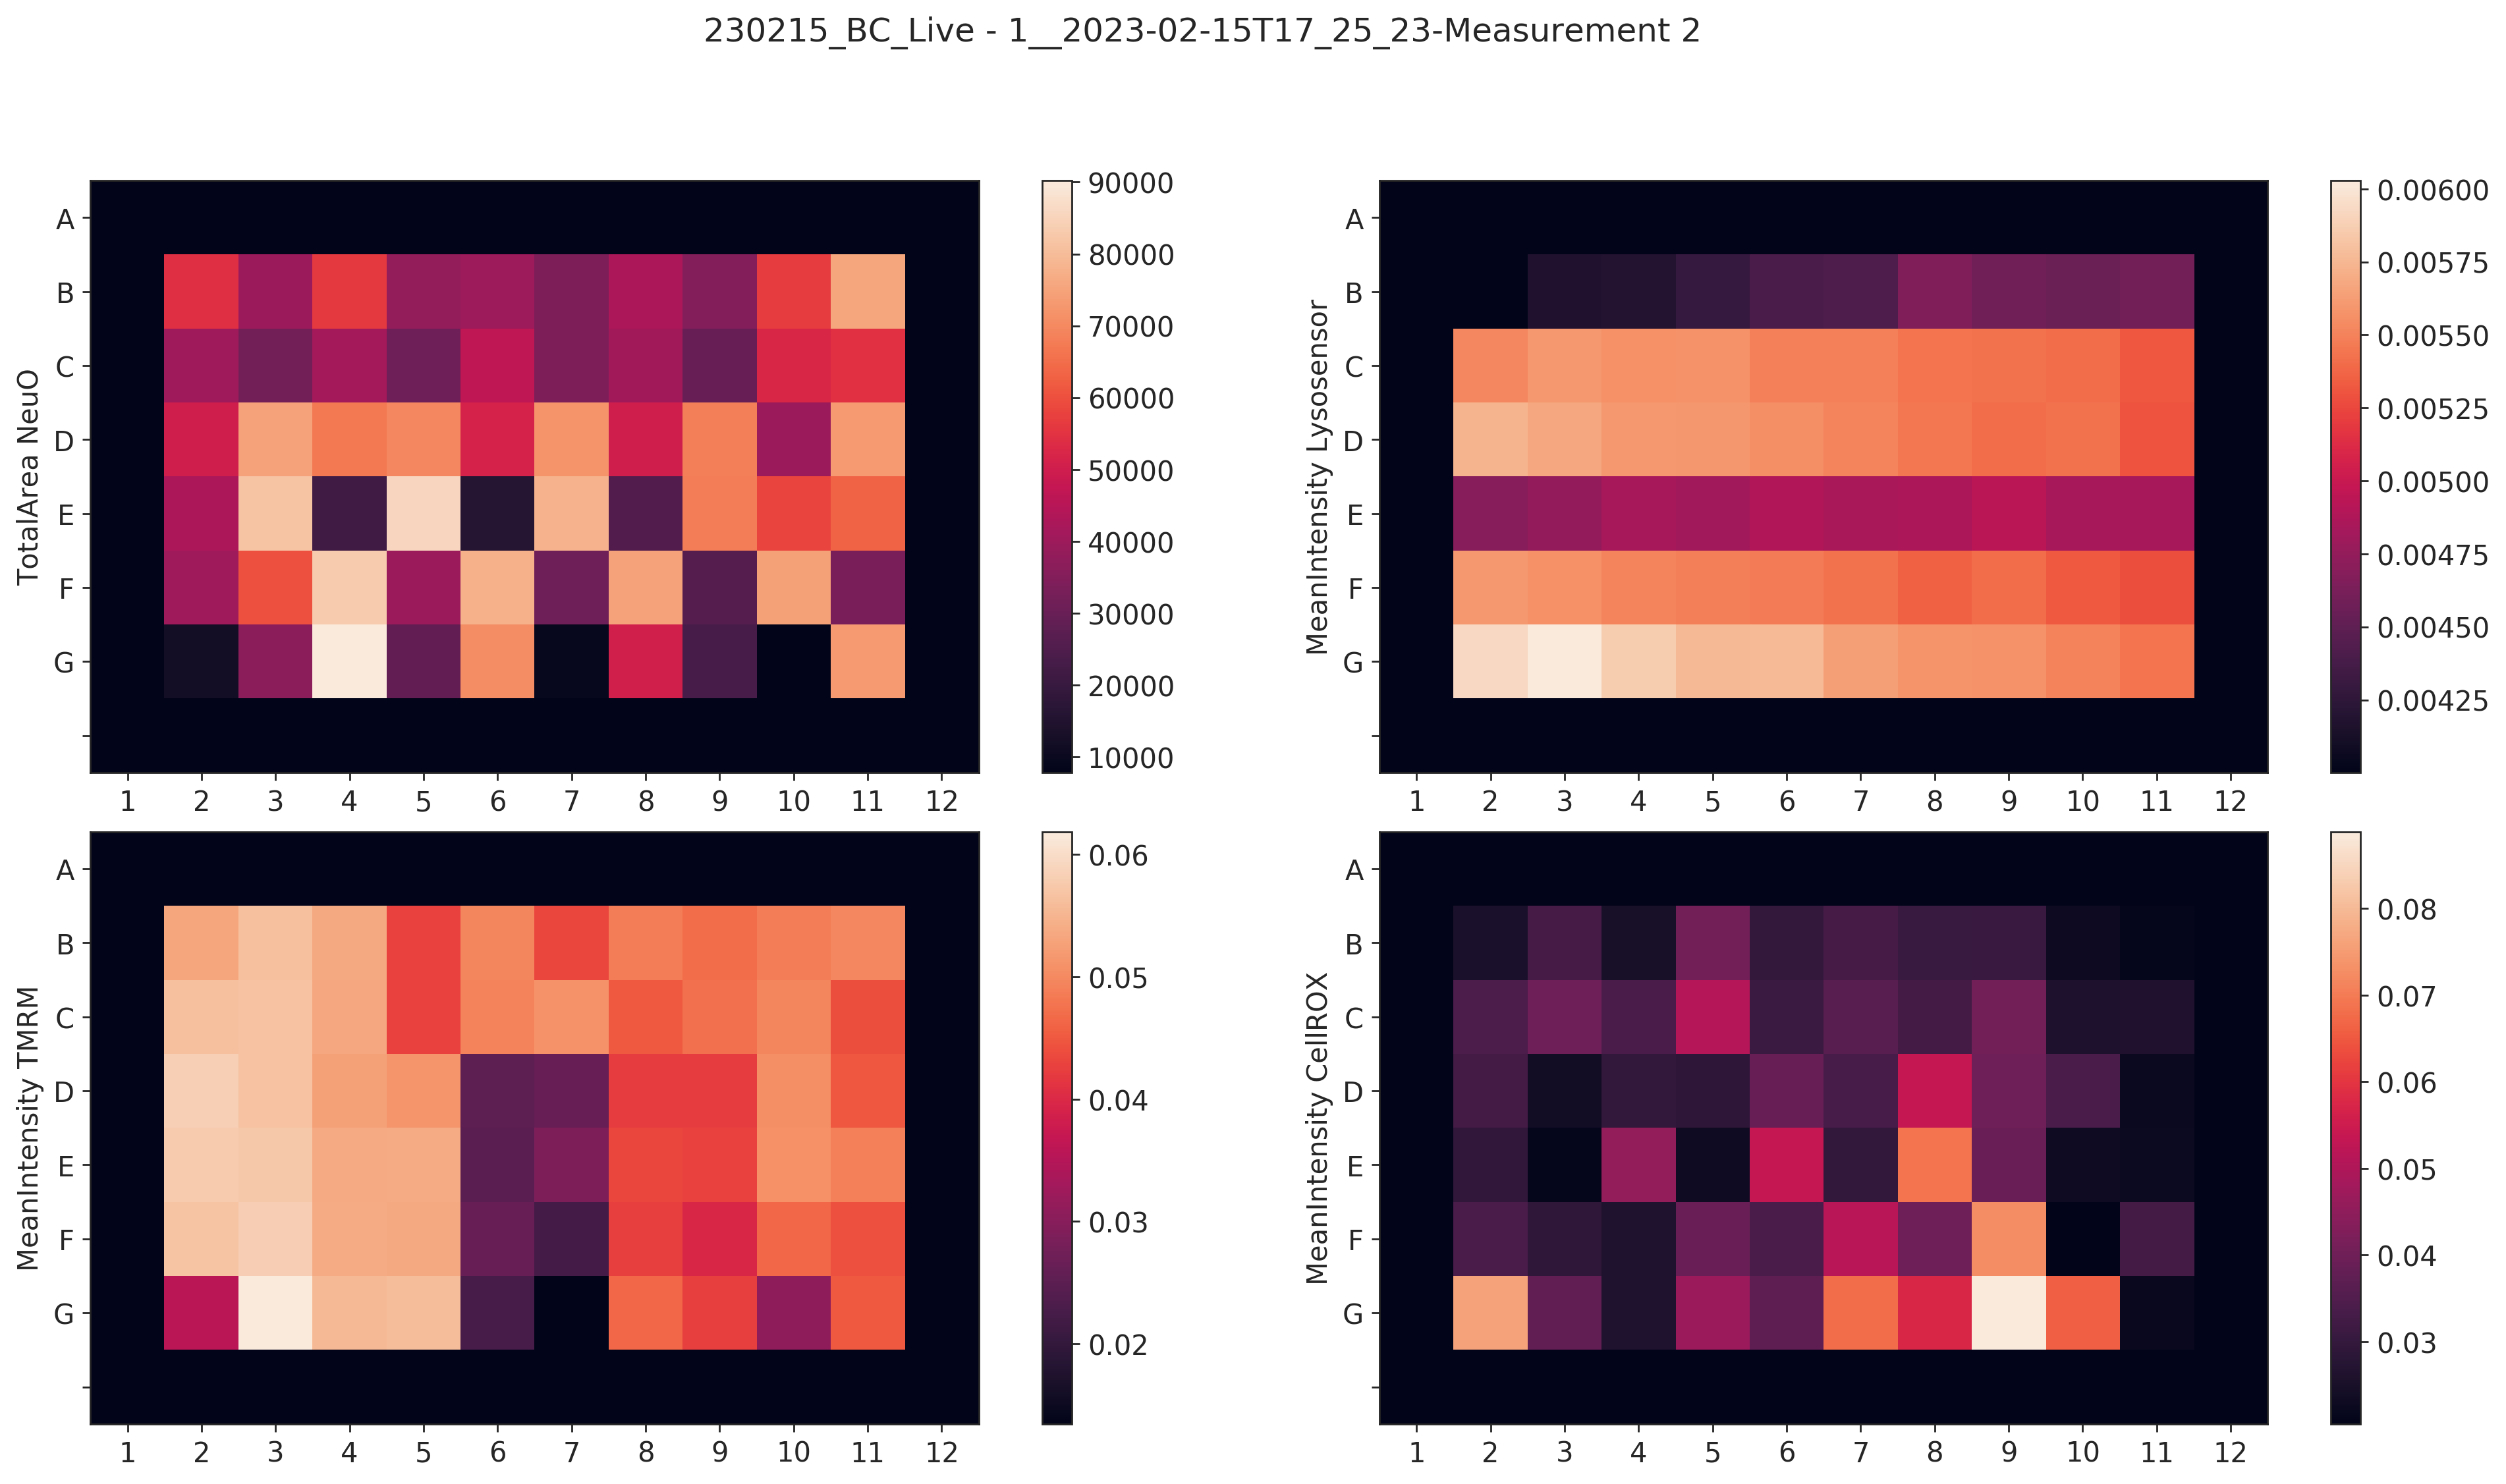

In [4]:
data_dir = data_dirs['DIV16_10x']
platemap = pd.read_csv(data_dir / 'platemap.csv')
data = pd.read_csv(data_dir / '2023-02-28_soma_segment' / '2023-02-28_soma_segment_Image.csv')
filename = 'FileName_NeuO_pre_illum'

# Set filename and well position
data['well_position'] = data['FileName_NeuO_pre_illum'].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
# Set filename and well position
plate = np.zeros([8, 12])
data['well_position'] = data[filename].apply(
    lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
)
data['row'] = data[filename].apply(
    lambda fname : int(fname[1:3])
)
data['col'] = data[filename].apply(
    lambda fname : int(fname[4:6])
)
data = data.merge(platemap, on='well_position')
data = data.groupby(['well_position', 'row', 'col', 'crispr']).mean()
# data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'concentration']).mean()
data = data.reset_index()

measurements = [
    'Intensity_TotalArea_NeuO_masked',
    'Intensity_MeanIntensity_Lysosensor_masked',
    'Intensity_MeanIntensity_TMRM_masked',
    'Intensity_MeanIntensity_CellROX_masked'
]

sns.set_style('ticks')
fig, axs = plt.subplots(2,2)

for i_m, m in enumerate(measurements):

    axs_row = floor(i_m/2)
    axs_col = i_m % 2

    plate[data['row']-1, data['col']-1] = data[m]
    vmin = plate[plate != plate.min()].min()
    im = axs[axs_row, axs_col].imshow(plate, vmin=vmin)
    axs[axs_row, axs_col].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
    axs[axs_row, axs_col].set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12])
    axs[axs_row, axs_col].set_yticks([0,1,2,3,4,5,6,7])
    axs[axs_row, axs_col].set_yticklabels(['A','B','C','D','E','F','G'])
    plt.colorbar(im, ax=axs[axs_row, axs_col])
    # plt.title(data_dir.parents[0].name + ' - ' + data_dir.name)

    # axs[axs_row, axs_col].tick_params(axis='x', rotation=25)
    axs[axs_row, axs_col].set_ylabel(m.split('_')[1] + ' ' + m.split('_')[2])
    # axs[axs_row, axs_col].xaxis.grid(True)
    # axs[axs_row, axs_col].legend('')
    
plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
plt.subplots_adjust(wspace=0.02, hspace=0.1)

/tmp/ipykernel_23579/729550554.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'col', 'concentration']).mean()
/tmp/ipykernel_23579/729550554.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'col', 'concentration']).mean()
/tmp/ipykernel_23579/729550554.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which

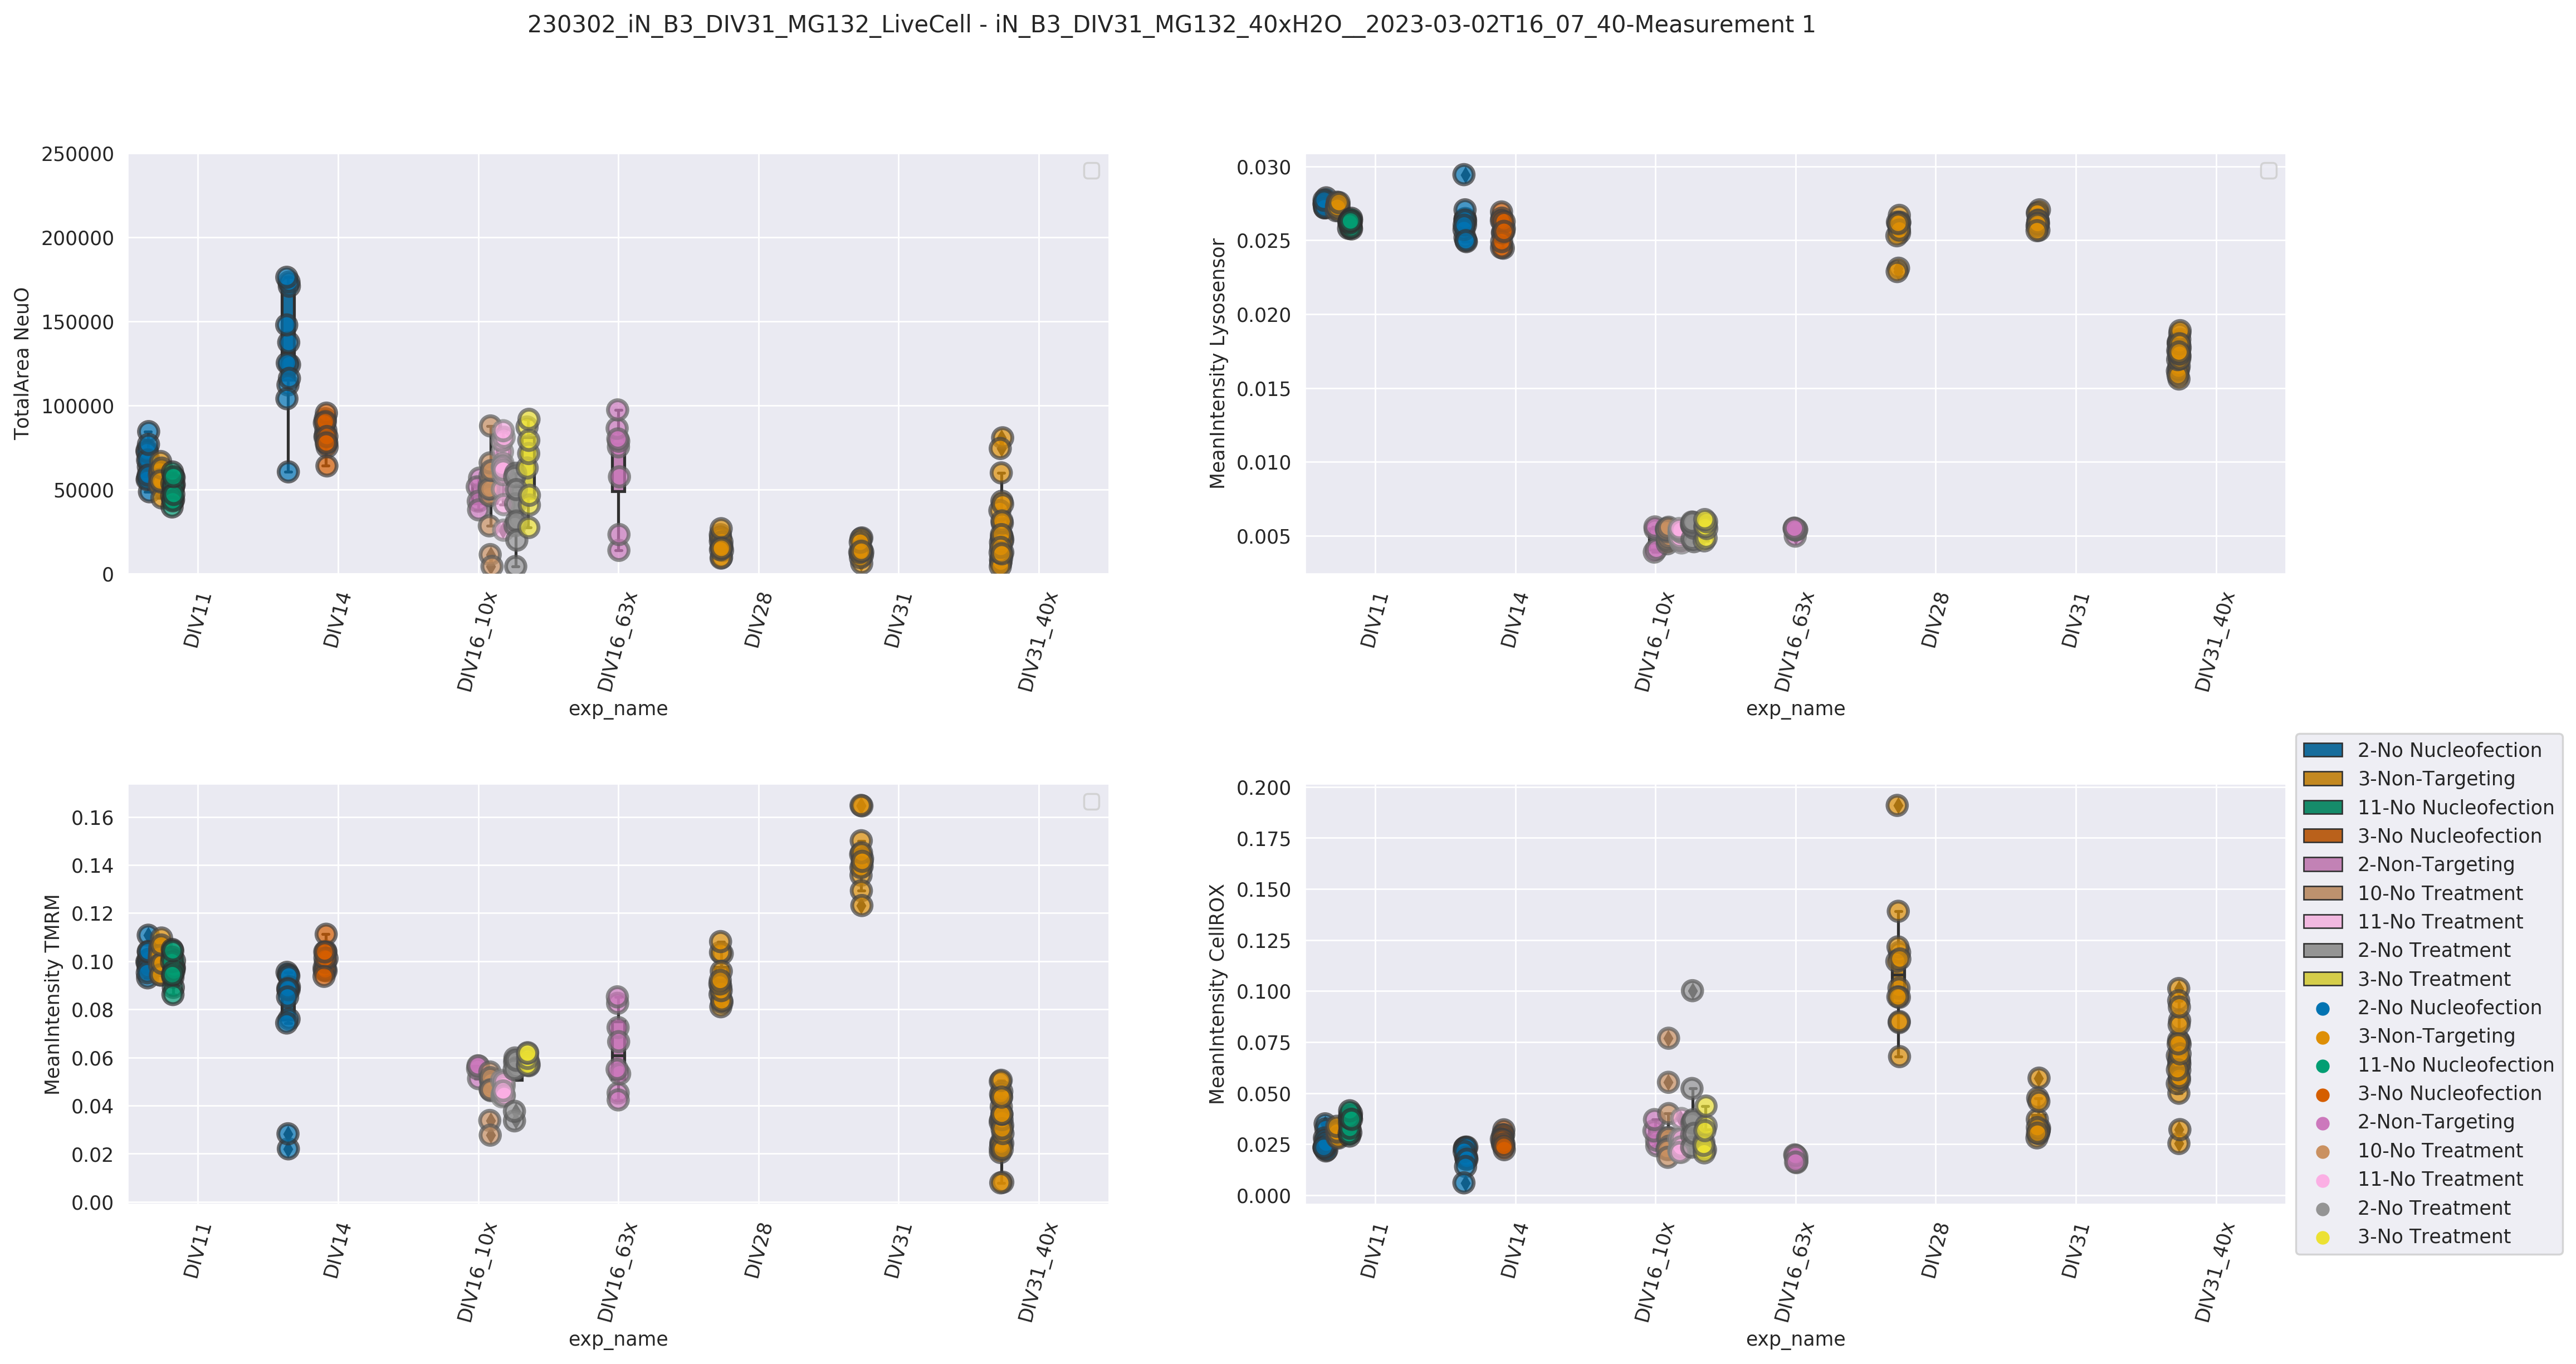

In [39]:
data_dir = data_dirs['DIV31']

d = []
for exp_name, data_dir in data_dirs.items():
    platemap = pd.read_csv(data_dir / 'platemap.csv')
    data = pd.read_csv(data_dir / '2023-02-28_soma_segment' / '2023-02-28_soma_segment_Image.csv')

    # Set filename and well position
    data['well_position'] = data['FileName_NeuO_pre_illum'].apply(
        lambda fname : chr(int(fname[1:3])+64) + fname[4:6]
    )
    data['row'] = data['FileName_NeuO_pre_illum'].apply(
    lambda fname : int(fname[1:3])
    )
    data['col'] = data['FileName_NeuO_pre_illum'].apply(
        lambda fname : int(fname[4:6])
    )

    data = data.merge(platemap, on='well_position')
    # data = data.groupby(['well_position', 'crispr']).mean()
    data = data.groupby(['FileName_NeuO_pre_illum', 'crispr', 'treatment', 'col', 'concentration']).mean()
    data = data.reset_index()
    measurements = [
        'Intensity_TotalArea_NeuO_masked',
        'Intensity_MeanIntensity_Lysosensor_masked',
        'Intensity_MeanIntensity_TMRM_masked',
        'Intensity_MeanIntensity_CellROX_masked'
    ]
    data['exp_name'] = exp_name
    d.append(data)

data = pd.concat(d, axis=0, ignore_index=True)
data = data.query('crispr == ["No Nucleofection", "Non-Targeting", "No Treatment"]')
# data['crispr'] = 'Ctrl'
data['crispr'] = data['col'].astype(str) + '-' + data['crispr']

sns.set_style('darkgrid')
fig, axs = plt.subplots(2,2)

for i_m, m in enumerate(measurements):

    axs_row = floor(i_m/2)
    axs_col = i_m % 2

    sns.boxplot(
        data=data, 
        x='exp_name', 
        # x='concentration',
        y=m, 
        palette='colorblind',
        hue='crispr',
        ax=axs[axs_row, axs_col]
    )
    sns.stripplot(
        data=data, 
        x='exp_name', 
        # x='concentration',
        y=m, 
        palette='colorblind', 
        hue='crispr',
        dodge=True,
        linewidth=2, 
        size=10, 
        alpha=0.7,
        ax=axs[axs_row, axs_col])
    
    axs[axs_row, axs_col].tick_params(axis='x', rotation=75)
    axs[axs_row, axs_col].set_ylabel(m.split('_')[1] + ' ' + m.split('_')[2])
    axs[axs_row, axs_col].xaxis.grid(True)

axs[0, 0].legend('')
axs[0, 1].legend('')
axs[1, 0].legend('')
axs[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[0,0].set_ylim([0, 250e3])
plt.suptitle(data_dir.parents[0].name + ' - ' + data_dir.name)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [28]:
data['crispr'].unique()

array(['2-No Nucleofection', '3-Non-Targeting', '4-ALG8', '5-AP3B2',
       '6-BAG6', '7-C2CD4A', '8-CAMLG', '9-CLCN3', '10-COG3',
       '11-No Nucleofection', '3-No Nucleofection', '4-ALG8 KO',
       '5-AP3B2 KO', '6-BAG6 KO', '7-C2CD4A KO', '8-Nigericin',
       '9-Nigericin', '10-Nigericin', '11-Nucleofection w/o sgRNA',
       '8-FCCP', '9-FCCP', '10-FCCP', '8-TBuOOH', '9-TBuOOH', '10-TBuOOH',
       '2-Non-Targeting', '3-UNC13A KO', '4-C9orf72 KO', '5-SCFD1 KO',
       '6-RANBP10 KO', '7-ZDHHC6 KO', '8-ZNF142 KO', '9-RESP18 KO',
       '10-No Treatment', '11-No Treatment', '2-No Treatment',
       '3-No Treatment', '4-Nigericin', '5-Nigericin', '6-FCCP', '7-FCCP',
       '4-UNC13A KO', '5-C9orf72 KO', '6-SCFD1 KO', '7-RANBP10 KO',
       '8-ZDHHC6 KO', '9-ZNF142 KO', '10-RESP18 KO'], dtype=object)

In [20]:
[[z, i] for [z, i] in enumerate(data_dirs)]

[[0, 'DIV11'],
 [1, 'DIV14'],
 [2, 'DIV16_10x'],
 [3, 'DIV16_63x'],
 [4, 'DIV28'],
 [5, 'DIV31'],
 [6, 'DIV31_40x']]

In [25]:
for x, i in data_dirs.items():
    print(x)
    print(i)

DIV11
/lab/processed-data/230303_iN_B5_DIV11_LiveCell/iN_B5_D11_LiveCell_20xH2O__2023-03-03T14_21_01-Measurement 1
DIV14
/lab/processed-data/230227_iN_B4_DIV14_LiveCell/1__2023-02-27T21_03_45-Measurement 4
DIV16_10x
/lab/processed-data/230215_BC_Live/1__2023-02-15T17_25_23-Measurement 2
DIV16_63x
/lab/processed-data/230215_BC_Live/2__2023-02-15T18_09_38-Measurement 1
DIV28
/lab/processed-data/230227_iN_B3_DIV28_LiveCell/1__2023-02-27T21_51_31-Measurement 5
DIV31
/lab/processed-data/230302_iN_B3_DIV31_MG132_LiveCell/iN_B3_DIV31_MG132__2023-03-02T15_25_55-Measurement 1
DIV31_40x
/lab/processed-data/230302_iN_B3_DIV31_MG132_LiveCell/iN_B3_DIV31_MG132_40xH2O__2023-03-02T16_07_40-Measurement 1


In [27]:
data['exp_name'] = 'test'
data['exp_name']

0      test
1      test
2      test
3      test
4      test
       ... 
803    test
804    test
805    test
806    test
807    test
Name: exp_name, Length: 808, dtype: object